In [2]:
%load_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
from matplotlib import rc

$\underline{\large{\rm Calculation\,of\,optical\,absorption\,coefficient\,from\,first\,principle}}$

We calculate the optical absorption coefficient $\alpha(\hbar\omega)$ from the first principles in the presence of phonons.

Below we define constants that will remail all accross the calculations



In [1]:
import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib import rc
import math
import os
import sys
import subprocess
sys.path.insert(0,str(os.getcwd())+'/../EPWpy/')
#sys.path.insert(0,str(os.getcwd())+'/../EPWpy/plotting/')
import EPWpy
from EPWpy import *
from plotting import plot_bands
from QE.PW_util import *

#sys.path.insert(0, '/workspace/QE_sabyadk/QE_SXT/bin/')
#print(sys.path)
############ Nice plot generation##################
#rc('text',usetex=True)
#rc('font',family='serif')
#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 1.5
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})
###################################################
################################
####Constants########
nr=3.3
hbar=6.6*10**-16
c=3*10**10
font=16
################################

##################
#Define folders for inputs

folder='./'

cores='4'
prefix='si'
pseudo='/home1/05193/sabyadk/pseudos'
######Define the directory of installation##############
QE = '/work2/05193/sabyadk/frontera/codes_EPW/EPW_sync_QE/q-e/bin/'
########################################################
home='/home1/05193/sabyadk/jupyter_nb_git/notebooks_basic'#os.getcwd()
print(home)
##################

########Define system which will remain constant throughout the calculation###############

silicon=EPWpy({'prefix':prefix,
               'restart_mode':'\'from_scratch\'',
               'ibrav':2,
               'nat':2,
               'calculation':'\'scf\'',
               'atomic_species':['Si'],
               'mass':[28.0855],
               'atoms':['Si','Si'],
               'ntyp':1,
               'pseudo':['Si.upf'],
               'ecutwfc':'40',
               'ecutrho':'160',
               'celldm(1)':'10.262',
               'verbosity':'high',
               'pseudo_dir':'\''+str(pseudo)+'\''                  
                },
               code=QE,
               env='ibrun')


#######Printing any attribute######
pseudopot=silicon.__dict__['pw_atomic_species']['pseudo'][0]
#prefix=str(silicon.__dict__['default_pw_control']['prefix'])
print('pseudopotential:', silicon.__dict__['pw_atomic_species']['pseudo'][0])
print('pseudopotential directory:', silicon.__dict__['pw_control']['pseudo_dir'])
#print(silicon.__dict__['default_pw_control'])
##print(silicon.__dict__['default_pw_system'])
#print(silicon.__dict__['default_pw_kpoints'])
print('prefix:',prefix)

os.system('module list')



/home1/05193/sabyadk/jupyter_nb_git/notebooks_basic

                                                                                                                         
                                                                                          
                                       -*#*-                             ...............- 
                          .+*=      .+%*-=%%:      .=#*-               -===============-:.
                        :*%=*%%-    *%*   #%*    :+%+-%%+             .:.  -=.   :==-.    
                        -%S  -%%*: :#%.   -%%-. -##:  #%*                  -=.   :==-     
                ..      .%S:   +%%%%*.     :*%%%#=    %%=                  -=.   :==-     
              :=#%%*-   .#S-     ..                  .%%=     :*#*:        -=.   :==-     
             -%S:.=#%%*==%#                           *%%=::=##-+%%.  .   .=-.   :==-  .= 
             :%%-   .-+++:                             -+##*=.  =%S   :-::==:    .==-  --.
      

0

$\underline{\large{\rm Self\,consistent\,field\,(SCF) \,calculations}}$

We first solve the Kohn-Sham equations to obtain the Kohn-Sham orbitals $\phi_v(r)$, $r$ is the electronic position (generally a mesh grid), $R$ is the position of ions.

$E[\phi_v,R]=-\frac{\hbar^2}{2m}\sum_v{\int{\phi_v^\star(r)\nabla^2\phi_v(r)dr}+\int{V_R(r)n(r)dr}+\frac{e^2}{2}\int{\frac{n(r)n(r')}{|r-r'|}drdr'}+E_{xc}[n(r')]+\sum_{I\neq J}{\frac{e^2}{2}\frac{Z_IZ_J}{|R_I-R_J|}}}$

We minimize $E(R)=min(E[\phi_v,R])$

Where, $\Big(-\frac{\hbar^2}{2m}\nabla^2+V_{KS}(r)\Big)\phi_v(r)=\epsilon_v\phi_v(r)$



In [3]:
######scf run##############

#######build scf file #############
silicon.scf(electrons={'conv_thr':'1E-13'},kpoints={'kpoints':[[6,6,6]]},name='scf')
#####################################

#subprocess.Popen('ibrun -np '+str(cores)+' '+str(QE)+'pw.x -nk '+str(cores)+' -input '+' ./scf.in > scf.out',shell=True)
silicon.prepare(4,type_run='scf')
silicon.run(4)

-- -- -- -- -- -- -- -- -- -- --  Calculation: scf  -- -- -- -- -- -- -- -- -- -- -- 
Running scf |████████████████████████████████████████| in 0.0s (198.00/s) 

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


$\underline{\large{\rm Bandstructure\,calculation}}$

We now calculate the bandstructure of the material (Si in our case).

The bandstructure is basically the eigenvectors of KS orbitals at various high symmetry k-points
$\Big(-\frac{\hbar^2}{2m}|k+G|^2+V_{KS}(G-G')\Big)\phi_v(k)=\epsilon_v(k)\phi_v(k)$

In [35]:
############Bandstructure run############

#### Create bandstructure files ######

silicon.scf(control={'calculation':'\'bands\''},system={'nbnd':12},electrons={'conv_thr':'1E-11'},
            kpoints={'kpoints':[['0.5', '0.5', '0.5', '20'],
                                ['0.0','0.0','0.0','20'],
                                ['0.5000','0.2500','0.7500','20']],
                     'kpoints_type':'{crystal_b}'},
            name='bs')
########################################

silicon.prepare(20,type_run='bs')
silicon.run(4,type_run='bs')

-- -- -- -- -- -- -- -- -- -- --  Calculation: bs  -- -- -- -- -- -- -- -- -- -- -- 
Running bs |████████████████████████████████████████| in 0.0s (153.03/s) 

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


$\underline{\large{\rm Plot\,bandstructure}}$

We now plot the bandstructure of the material (Si in our case).


(41, 12)
Fermi level 6.45 eV


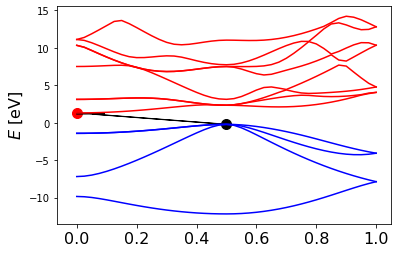

In [19]:
############# Plot Bandstructure ############

#######inputs$$###############
Band=plot_bands.plot_band_scf('./si/bs/bs.out')
#print((Band))
xticks=['$\Gamma$','K','M','$\Gamma$']

ef0=find_fermi('./si/scf/scf.out')+0.1

xticks=['X','$\Gamma$','L']

ef0=6.45

plot_bands.plot_band_prod(Band,ef0=ef0)

print('Fermi level',ef0,'eV')

$\underline{\large{\rm Phonon\,calculations}}$

In order to obtain the optical absorption coefficient, we need the electron-phonon interactions. 
Which is the first derivative of the lattice potential.
We also need phonon energies and displacement vectors.
We obtain all these quantities using the density-functional perturbation theory (DFPT)

https://docs.epw-code.org/_downloads/b3f5899664a87fcdd6dcacc262e6f103/Mon.1.Giannozzi.pdf

We solve for $q$-grid: $2\times2\times2$

In [13]:
############Phonon run############

##Prepare file
silicon.ph(phonons={'fildyn':'\'si.dyn\'',
                    'nq1':3,
                    'nq2':3,
                    'nq3':3,
                    'fildvscf':'\'dvscf\''})
#silicon.prepare(20,type_run='ph')

###########

#######Run ph #########

#silicon.run(4,type_run='ph')


We can plot the phonon spectra using the matdyn.x but we will directly plot the interpolated phonon spectra in a later step.

$\underline{\large{\rm non-self\,consistent\,field\,(NSCF) \,calculations}}$

We now solve the  non-self-consistent DFT calculation for a k-point grid of $6\times6\times6$

In [11]:
############nscf run############

silicon.nscf(system={'nbnd':12},
             kpoints={'grid':[6,6,6],
                      'kpoints_type': 'crystal'})

silicon.prepare(20,type_run='nscf')

######### Run #####################

silicon.run(4,type_run='nscf')


####################################



$\underline{\large{\rm Wannierization\,of\,electronic\,and\,phonon\,part\,(EPW\,I)}}$

Now, we have the phonon spectra, the dynamical matrices, and the electron-phonon interactions.
We next interpolate these using the EPW code (https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.89.015003). 
The first step consists of finding the Wannier functions.
In the second step one uses the Wannier functions for obtaining electron-phonon matrix elements on a fine grid.
We also use a scissor shifted eigenvalue file for interpolation si.eig


In [9]:
############epw run############

########Generate epw1 file############

silicon.epw(epwin={'wdata':['\'guiding_centres = .true.\'',
                            '\'dis_num_iter = 500\'',
                            '\'num_print_cycles  = 10\'',
                            '\'dis_mix_ratio = 1\'',
                            '\'use_ws_distance = T\''],
                            'proj':['\'Si : sp3\''],
                            'band_plot':'.true.',
                            'filkf':'\'LGX.txt\'',
                            'filqf':'\'LGX.txt\'',
                            'eig_read':'false'},    
                           # 'nk1':6,
                           # 'nk2':6,
                           # 'nk3':6,
                           # 'nq1':3,
                           # 'nq2':3,
                            #'nq3':3},
            name='epw1')

######################################################################################
######## Generate filkf if needed with the same name as the filkf key above##########
silicon.filkf(path=[[0.5,0.5,0.5],
        [0,0,0],[0.5,0.5,0.5]],length=[51,51],name='LGX.txt')
######################################################################################




In [10]:
########## run epw1 ############
#print(os.system('pwd'))


silicon.prepare(20,type_run='epw1') 


#os.chdir('./epw')

#silicon.pp()
#silicon.set_home()




In [12]:
silicon.run(16,type_run='epw1')

-- -- -- -- -- -- -- -- -- -- --  Calculation: epw1  -- -- -- -- -- -- -- -- -- -- -- 
Running epw1 |████████████████████████████████████████| in 0.0s (148.62/s) 

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


$\underline{\large{\rm Plot\,electron\,and\,phonon\,dispersion\,obtained\,from\,EPW}}$

At this point, we plot the electronic and phonon bandstructure obtained from the Wannier interpolation

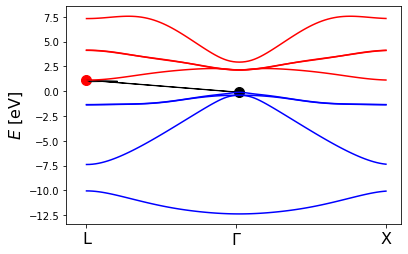

In [20]:
#####plot electron and phonon bandstructure from epw #####


os.system('pwd')

####Electroninc #################
#######inputs$$###############
Band=plot_bands.plot_band_eig('./si/epw/band.eig')
#xticks=['$\Gamma$','K','M','$\Gamma$']
#ticks=['$\Gamma$','X','W','K','$\Gamma$']

xticks=['L','$\Gamma$','X']
ef0=6.45+0.2
##############################

plot_bands.plot_band_prod(Band,ef0=ef0,xticks=xticks)
############################




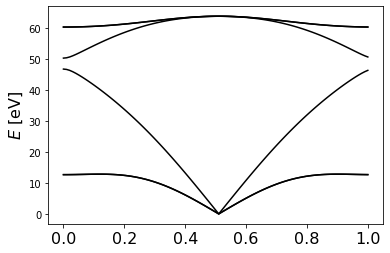

In [5]:
####Phonon #################
#######inputs$$###############
Band=plot_bands.plot_band_eig('./si/epw/phband.freq')
#xticks=['$\Gamma$','K','M','$\Gamma$']
xticks=['L','$\Gamma$','X']
ef0=0
##############################

plot_bands.plot_band_freq(Band,xticks)
############################


$\underline{\large{\rm Wannier\,interpolation\,and\,calculation\,of\,optical\,absorption\,(EPW\,II)}}$

We now have the Wannier functions which we will use to obtain the optical absorption coefficient.
We solve for $k$-grid: $12\times12\times12$ and $q$-grid: $3\times3\times3$

In [14]:
########## run epw2 ############
######## Write epw2 file ####################

silicon.epw(epwin={'elph':'.true.',
                   'epbwrite':'.false.',
                   'epbread':'.false.',
                   'epwwrite': '.false.',
                   'epwread':'.true.',
                   'etf_mem': '1',
                   'wannierize':'.false.',
                   'omegamin':0.05,
                   'omegamax':4.0,
                   'omegastep':0.05,
                   'lindabs':'.true.',
                   'eig_read':'.false.',
                   'nkf1':12,
                   'nkf2':12,
                   'nkf3':12,
                   'nqf1':3,
                   'nqf2':3,
                   'nqf3':3,  
                   'mp_mesh_k':'.true.',
                   'efermi_read':'.true.',
                   'fermi_energy':6.5,
                   'lpolar':'.true.',
                   'fsthick': 5.5,
                   'temps':300 ,
                   'degaussw':0.1},
            name='epw2')

##############################################

silicon.prepare(16,type_run='epw2')

#subprocess.Popen('cp -r ./si/epw2.in ./si/epw/',shell=True).wait()
#print(os.getcwd())
silicon.run(16,type_run='epw2')


-- -- -- -- -- -- -- -- -- -- --  Calculation: epw2  -- -- -- -- -- -- -- -- -- -- -- 
Running epw2 |████████████████████████████████████████| in 0.0s (160.29/s) 

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


$\underline{\large{\rm Plotting\,phonon-assisted\,optical\,asbsorption\, (Old-method)}}$

First we plot the data obtained by simple indirect absorption without any modifications
$\newcommand{\mrm}[1]{\mathrm{#1}}$
$\newcommand{\vec}[1]{{\mathbf{\mathrm{#1}}}}$
$\newcommand{\Ver}[1]{$V_\mathrm{er}$}$

$$\alpha(\omega)=2\frac{(4\pi^2e^2)}{\omega c n_r(\omega)}\frac{1}{V_{\mathrm{cell}}}\frac{1}{N_kN_q}\sum_{\nu mn\vec{k}\vec{q}}|\vec{\lambda}.(S_1+S_2)|^2\times P \delta(\epsilon_{m,\vec{k+q}}-\epsilon_{n\vec{k}}-\hbar \omega \pm \hbar\omega_{\nu\vec{q}})$$
Here, the $\hbar\omega$ and $\vec{\lambda}$ are the energy and the polarization of the photon, $n_r({\omega})$ is the refractive index . The optical matrix elements are,
\begin{equation}
S_1=\sum_{m'}\frac{v_{mm'}(\vec{k})g_{m'n,\nu}(\vec{k},\vec{q})}{\epsilon_{m'\vec{k}}-\epsilon_{n\vec{k}}-\hbar\omega+\vec{i}\Gamma}
\end{equation}
\begin{equation}
S_2=\sum_{m'}\frac{g_{nm',\nu}(\vec{k},\vec{q})v_{m'm}(\vec{k+q})}{\epsilon_{m'\vec{k+q}}-\epsilon_{n\vec{k}}-\hbar\omega_{\nu \vec{q}}+\vec{i}\Gamma}
\end{equation}

We will refer to this method as KP

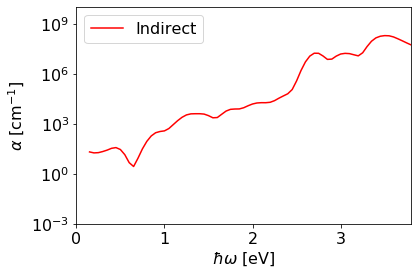

In [15]:
####### plot dielectric constant #############33

nr=3.3
#Exp_energy,Exp_alpha=read_exp('exp.dat')
eps_ind=np.loadtxt('./si/epw/epsilon2_indabs_300.0K.dat')
omega_ind=eps_ind[:,0]
#print(np.shape(omega_ind))
alpha_ind=(omega_ind/(float(hbar*c)*nr))*eps_ind[:,1]
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)


#ax1.semilogy(Exp_energy,Exp_alpha,color='k',marker='^',alpha=0.2)
ax1.semilogy(omega_ind+0.1,alpha_ind,color='r')


ax1.tick_params('x',colors='black',labelsize=font)
ax1.tick_params('y',colors='k',labelsize=font)
ax1.set_xlabel('$\hbar\omega$ [eV]',fontsize=font)
ax1.set_ylabel('$\\alpha$ [$ \\rm cm^{-1}$]',color='k',fontsize=font)
#ax2.set_ylabel('States [a.u]',fontsize=font,color='red')
ax1.legend(['Indirect'],fontsize=font)
ax1.axis([0.0,3.8,1e-3,1e10])
plt.show()
plt.close()

In [27]:
########## run epw2 ############
os.chdir(home)

print(os.system('pwd'))
######## Write epw2 file ####################

silicon.epw(epwin={'elph':'.true.',
                   'epbwrite':'.false.',
                   'epbread':'.false.',
                   'epwwrite': '.false.',
                   'epwread':'.true.',
                   'etf_mem': '1',
                   'wannierize':'.false.',
                   'omegamin':0.05,
                   'omegamax':4.0,
                   'omegastep':0.05,
                   'lindabs':'.true.',
                   'nkf1':12,
                   'nkf2':12,
                   'nkf3':12,
                   'nqf1':3,
                   'nqf2':3,
                   'nqf3':3,  
                   'mp_mesh_k':'.true.',
                   'efermi_read':'.true.',
                   'fermi_energy':7.1,
                   'lpolar':'.true.',
                   'eig_read':'.false.',
                   'fsthick': 5.5,
                   'temps':300 ,
                   'degaussw':0.1,
                   'len_mesh':25,
                   'meshnum':24,
                   'quasiabs':'.true.',
                   'QD_min':0.6,
                   'QD_bin':0.2,
                   'nq_init':-1},
            name='epw2')

##############################################

silicon.prepare(16,type_run='epw2')
silicon.run(16,type_run='epw2')


0
-- -- -- -- -- -- -- -- -- -- -- -- Warning -- -- -- -- -- -- -- -- -- -- -- -- -- 
Refreshing EPW input (remove refresh from epw_save.json if not needed)
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
-- -- -- -- -- -- -- -- -- -- --  Calculation: epw2  -- -- -- -- -- -- -- -- -- -- -- 
Running epw2 |████████████████████████████████████████| in 0.0s (148.01/s) 

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


$\underline{\large{\rm Plotting\,phonon-assisted\,optical\,asbsorption\, (QDPT)}}$

We now use QDPT for obtaining the absorption coefficient
$\newcommand{\mrm}[1]{\mathrm{#1}}$
$\newcommand{\vec}[1]{{\mathbf{\mathrm{#1}}}}$
$\newcommand{\Ver}[1]{$V_\mathrm{er}$}$

$\def\>{\rangle} $
$\def\<{\langle} $
$\def\bk{{\bf k}}$
$\def\bq{{\bf q}}$
$\def\be{{\bf e}}$
$\def\bv{{\bf v}}$
$\def\a{\alpha}$
$\def\d{\delta}$
$\def\w{\omega}$
$\def\ve{\varepsilon}$
$\def\hc{{\hat{c}^{\phantom{\dagger}}}}$
$\def\hcd{{\hat{c}^\dagger}}$
$\def\hH{{\hat{H}}}$
$\def\hp{{\hat{\bf p}}}$
$\def\ha{{\hat{a}^{\phantom{\dagger}}}}$
$\def\had{{\hat{a}^\dagger}}$
$\def\Vep{\hat{V}_{\rm ep}}$
$\def\Ver{\hat{V}_{\rm er}}$



We use the QDPT expession for imaginary dielectric constant

\begin{eqnarray}
  && \ve_2(\w) = \frac{\pi e^2}{\epsilon_0 \Omega} \frac{1}{\w^2}\frac{1}{N_{\rm BZ}} 
  \bigg|\,\be \cdot \!\sum_{cv\bk} 
    \Big\{
   U^*_{d_0,i_0-1_{v\bk}+1_{c\bk}} \bv_{cv\bk} \nonumber \\ && 
    +N_{\rm BZ}^{-1/2} \!\sum_{\bq\nu\eta} 
    \sqrt{n_{\bq\nu}\!+\!(1\!+\!\eta)/2} 
    \,\, U^*_{d_0,i_0-1_{v\bk}+1_{c\bk+\bq}+\eta 1_{-\eta \bq\nu}}  
  \nonumber \\[-3pt]
   &&  
    \times \bigg[\!
   \sum_{c'} 
     \frac{ g_{cc'\nu}(\bk,\bq) \bv_{c'v\bk}  } 
     {(\bar E\!-\!E_{i_0})\!-\!(\ve_{c'\bk}\!-\!\ve_{v\bk})}
     \, \theta_{c'v\bk} 
\nonumber \\
  & &
     + \sum_{v'} 
      \frac{ \bv_{cv'\bk+\bq} \, g_{v'v\nu}(\bk,\bq)  } 
     {(\bar E\!-\!E_{i_0})\!-\!(\ve_{c\bk+\bq}\!-\!\ve_{v'\bk+\bq})} 
     \,\theta_{cv'\bk+\bq} 
    \!  \nonumber \\[-3pt]
  & &
     + \sum_{c'} 
     \frac{\bv_{cc'\bk+\bq} \, g_{c'v\nu}(\bk,\bq)  }{\ve_{v\bk}\!-\!\ve_{c'\bk+\bq}\!-\!\eta\hbar\w_{\bq\nu}}
     \!+\! \sum_{v'} 
      \frac{g_{cv'\nu}(\bk,\bq) \bv_{v'v\bk} } {\ve_{v'\bk}\!-\!\ve_{c\bk+\bq}\!-\!\eta\hbar\w_{\bq\nu}}
\bigg] \!\bigg\}\! 
  \Bigg|^2  \nonumber \\[2pt] 
   && \times\,\delta(E_{d_0}-E_{i_0}- \hbar \omega)~. 
   \label{e:epsilon}
\end{eqnarray}

We will refer to this method as KP

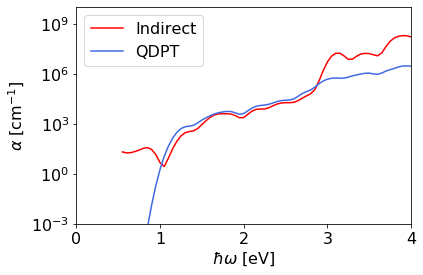

In [29]:
####### plot dielectric constant #############33

nr=3.3
eps_ind=np.loadtxt('./si/epw/epsilon2_indabs_300.0K.dat')
eps_qd=np.loadtxt('./si/epw/epsilon2_indabs_300.0K_24.dat')
omega_ind=eps_ind[:,0]
omega_qd=eps_qd[:,0]

#print(np.shape(omega_ind))
alpha_ind=(omega_ind/(float(hbar*c)*nr))*eps_ind[:,1]
alpha_qd=(omega_ind/(float(hbar*c)*nr))*eps_qd[:,1]

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)


#ax1.semilogy(Exp_energy,Exp_alpha,color='k',marker='^',alpha=0.2)
ax1.semilogy(omega_ind+0.5,alpha_ind,color='r')
ax1.semilogy(omega_qd+0.5,alpha_qd,color='royalblue')

ax1.tick_params('x',colors='black',labelsize=font)
ax1.tick_params('y',colors='k',labelsize=font)
ax1.set_xlabel('$\hbar\omega$ [eV]',fontsize=font)
ax1.set_ylabel('$\\alpha$ [$ \\rm cm^{-1}$]',color='k',fontsize=font)
#ax2.set_ylabel('States [a.u]',fontsize=font,color='red')
ax1.legend(['Indirect','QDPT'],fontsize=font)
ax1.axis([0.0,4.0,1e-3,1e10])
plt.show()
plt.close()

In [31]:
############Kramers-Kronig-Analysis ################################


silicon.type_run='qdabs'
silicon.epw_params['meshnum']='24'

silicon.eps0=10.0
silicon.temp=300.0
eps1=silicon.eps1
eps2=silicon.eps2
omega=silicon.omega
nr=silicon.nr
plt.plot(omega,eps1)
plt.plot(omega,eps2)
#plt.plot(omega,nr)


#alpha=silicon.alpha


AttributeError: 'EPWpy' object has no attribute 'default_epw_input'